In [1]:
# goal: given a source program. Check that there is only one main circuit, 
# then split it into sections and optimize only some of them with the optimization
# manager

In [9]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
from inspector import Inspector
from tqdm import tqdm
import sqlite3 as sl
import os

In [10]:
%load_ext autoreload
%autoreload 2

In [33]:
config = load_config_and_check("../config/qmt_v05.yaml")

In [4]:
from metamorph import *
from qmt import get_mr_function_and_kwargs
from metamorph_test import show_tree

## Source Generation

In [5]:
from generation_strategy_python import QiskitFuzzer
import numpy as np
import random

In [6]:
np.random.seed(42)
random.seed(42)

config_generator = config["generation_strategy"]
generator =  QiskitFuzzer()


py_file, metadata = generator.generate_file(
    gate_set=config_generator["gate_set"],
    n_qubits=10,
    n_ops=10,
    optimizations=[],
    backend="qasm_simulator",
    shots=1024,
    level_auto_optimization=3,
    target_gates=None
)

In [7]:
print(py_file)


# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(10, name='qr')
cr = ClassicalRegister(10, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(UGate(5.004827191577157,1.1525547765126551,4.898943037054019), qargs=[qr[9]], cargs=[])
qc.append(U1Gate(4.448951217224888), qargs=[qr[8]], cargs=[])
qc.append(CUGate(3.843130151069924,0.04439890513257482,0.14490549016815404,3.2972564349156697), qargs=[qr[1], qr[5]], cargs=[])
qc.append(CRXGate(1.0714346684716647), qargs=[qr[2], qr[5]], cargs=[])
qc.append(C4XGate(), qargs=[qr[8], qr[5], qr[1], qr[7], qr[0]], cargs=[])
qc.append(DCXGate(), qargs=[qr[0], qr[7]], cargs=[])
qc.append(YGate(), qargs=[qr[4]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[6], qr[2], qr[5]], cargs=[])
qc.append(RZXGate(5.040352282937607), qargs=[qr[1], qr[5]], cargs=[])
qc.append(CZGate(), qargs=[qr[6],

In [8]:
show_tree("qc = QuantumCircuit(qr, cr, name='qc')")

Module(
    body=[
        Assign(
            lineno=1,
            col_offset=0,
            end_lineno=1,
            end_col_offset=38,
            targets=[Name(lineno=1, col_offset=0, end_lineno=1, end_col_offset=2, id='qc', ctx=Store())],
            value=Call(
                lineno=1,
                col_offset=5,
                end_lineno=1,
                end_col_offset=38,
                func=Name(lineno=1, col_offset=5, end_lineno=1, end_col_offset=19, id='QuantumCircuit', ctx=Load()),
                args=[
                    Name(lineno=1, col_offset=20, end_lineno=1, end_col_offset=22, id='qr', ctx=Load()),
                    Name(lineno=1, col_offset=24, end_lineno=1, end_col_offset=26, id='cr', ctx=Load()),
                ],
                keywords=[
                    keyword(
                        arg='name',
                        value=Constant(lineno=1, col_offset=33, end_lineno=1, end_col_offset=37, value='qc', kind=None),
                    ),
    

In [9]:
show_tree("qc.append(U1Gate(4.448951217224888), qargs=[qr[8]], cargs=[])")

Module(
    body=[
        Expr(
            lineno=1,
            col_offset=0,
            end_lineno=1,
            end_col_offset=61,
            value=Call(
                lineno=1,
                col_offset=0,
                end_lineno=1,
                end_col_offset=61,
                func=Attribute(
                    lineno=1,
                    col_offset=0,
                    end_lineno=1,
                    end_col_offset=9,
                    value=Name(lineno=1, col_offset=0, end_lineno=1, end_col_offset=2, id='qc', ctx=Load()),
                    attr='append',
                    ctx=Load(),
                ),
                args=[
                    Call(
                        lineno=1,
                        col_offset=10,
                        end_lineno=1,
                        end_col_offset=35,
                        func=Name(lineno=1, col_offset=10, end_lineno=1, end_col_offset=16, id='U1Gate', ctx=Load()),
                        args=[Con

In [10]:
from metamorph import replace_identifier
replace_identifier("qc.append(U1Gate(4.448951217224888), qargs=[qr[8]], cargs=[])", identifier="qc", replacement="qc_1")

'qc_1.append(U1Gate(4.448951217224888), qargs=[qr[8]], cargs=[])\n'

## Create followup

In [22]:
# extract the main circuit and the size of its registers
# create n empty circuits with the same sized register, but empty
# scan all the operations
# allocate some lines to different n sub-sections

# replace identifiers in every section with those specific of the given sub-section

# FOLLOW-UP SPECIFIC
# run m random optimizations pass for each sub-section

# assemble the original circuit with those parts

In [87]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
config_5 = load_config_and_check("../config/qmt_v05.yaml")

morph, kwargs = get_mr_function_and_kwargs(config_5, metamorphic_strategy="add_section_optimizations")
out_code = morph(py_file, **kwargs)[0]
print(out_code)

# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(10, name='qr')
cr = ClassicalRegister(10, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')


qr_0 = QuantumRegister(10, name='qr_0')
cr_0 = ClassicalRegister(10, name='cr_0')
qc_0 = QuantumCircuit(qr_0, cr_0, name='qc_0')

qc_0.append(UGate(5.004827191577157, 1.1525547765126551, 4.898943037054019),
    qargs=[qr_0[9]], cargs=[])
qc_0.append(U1Gate(4.448951217224888), qargs=[qr_0[8]], cargs=[])
qc_0.append(CUGate(3.843130151069924, 0.04439890513257482, 
    0.14490549016815404, 3.2972564349156697), qargs=[qr_0[1], qr_0[5]],
    cargs=[])
qc_0.append(CRXGate(1.0714346684716647), qargs=[qr_0[2], qr_0[5]], cargs=[])
qc_0.append(C4XGate(), qargs=[qr_0[8], qr_0[5], qr_0[1], qr_0[7], qr_0[0]],
    cargs=[])
qc_0.append(DCXGate(), qargs=[qr_0[0], qr_0[7]], cargs=[])
qc_0.append(YGate(

In [69]:
%debug

> /home/paltenmo/projects/ML4Quantum/notebooks/mtrand.pyx(905)numpy.random.mtrand.RandomState.choice()

--KeyboardInterrupt--
--KeyboardInterrupt--
ipdb> q


In [60]:
qc = QuantumCircuit(2)
qc.rx(0.5, 0)
qc.rx(0.5, 0)
qc.draw()

qc.measure_all()

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_7abe5979f93342ae86435c0f383eb5a1 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_7abe5979f93342ae86435c0f383eb5a1, shots=1024).result().get_counts(qc)
counts

{'01': 213, '00': 811}

## Plot Diagrams

In [62]:
source_circuit = py_file
source_circuit = source_circuit[:source_circuit.index("""# SECTION
# NAME: OPTIMIZATION_LEVEL""")]
exec(source_circuit)
qc.draw(fold=-1)

┌───┐┌──────┐                            
 qr_0: ────────────────────────────────────────────────────────┤ X ├┤0     ├────────────────────────────
                                                               └─┬─┘│      │         ┌──────────────┐   
 qr_1: ──────────────────■───────────────────────────────────────■──┤      ├─────────┤0             ├───
                         │                                       │  │      │┌───────┐│              │   
 qr_2: ──────────────────┼─────────────────────────────■─────────┼──┤      ├┤1      ├┤              ├───
                         │                             │         │  │      ││       ││              │   
 qr_3: ──────────────────┼─────────────────────────────┼─────────┼──┤      ├┤       ├┤  Rzx(5.0404) ├─■─
                         │                  ┌───┐      │         │  │  Dcx ││       ││              │ │ 
 qr_4: ──────────────────┼──────────────────┤ Y ├──────┼─────────┼──┤      ├┤  Rccx ├┤              ├─┼─
       ┌─────────────────┴─────────────────┐└───┘┌─────┴──────┐  │  │      ││       ││              │ │ 
 qr_5: ┤ U(3.8431,0.044399,0.14491,3.2973) ├─────┤ Rx(1.0714) ├──■──┤      ├┤2      ├┤1             ├─┼─
       └───────────────────────────────────┘     └────────────┘  │  │      ││       │└──────────────┘ │ 
 qr_6: ──────────────────────────────────────────────────────────┼──┤      ├┤0      ├─────────────────■─
                                                                 │  │      │└───────┘                   
 qr_7: ──────────────────────────────────────────────────────────■──┤1     ├────────────────────────────
                   ┌───────────┐                                 │  └──────┘                            
 qr_8: ────────────┤ U1(4.449) ├─────────────────────────────────■──────────────────────────────────────
            ┌──────┴───────────┴──────┐                                                                 
 qr_9: ─────┤ U(5.0048,1.1526,4.8989) ├─────────────────────────────────────────────────────────────────
            └─────────────────────────┘                                                                 
cr: 10/═════════════════════════════════════════════════════════════════════════════════════════════════

In [76]:
followup_circuit = out_code
followup_circuit = followup_circuit[:followup_circuit.index("""# SECTION
# NAME: OPTIMIZATION_LEVEL""")]
exec(followup_circuit)
qc.decompose().draw(fold=-1)

global phase: 0.53784
                                                                       ┌───┐┌──────┐                            
 qr_0: ────────────────────────────────────────────────────────────────┤ X ├┤0     ├────────────────────────────
                                                                       └─┬─┘│      │         ┌──────────────┐   
 qr_1: ──────────────────────────────■───────────────────────────────────■──┤      ├─────────┤0             ├───
                                     │                                   │  │      │┌───────┐│              │   
 qr_2: ──────────────────────────────┼─────────────────────────■─────────┼──┤      ├┤1      ├┤              ├───
                                     │                         │         │  │      ││       ││              │   
 qr_3: ──────────────────────────────┼─────────────────────────┼─────────┼──┤      ├┤       ├┤  Rzx(5.0404) ├─■─
       ┌──────────┐                  │                         │         │  │  Dcx ││       ││              │ │ 
 qr_4: ┤ R(π,π/2) ├──────────────────┼─────────────────────────┼─────────┼──┤      ├┤  Rccx ├┤              ├─┼─
       └──────────┘┌─────────────────┴─────────────────┐ ┌─────┴──────┐  │  │      ││       ││              │ │ 
 qr_5: ────────────┤ U(3.8431,0.044399,0.14491,3.2973) ├─┤ Rx(1.0714) ├──■──┤      ├┤2      ├┤1             ├─┼─
                   └───────────────────────────────────┘ └────────────┘  │  │      ││       │└──────────────┘ │ 
 qr_6: ──────────────────────────────────────────────────────────────────┼──┤      ├┤0      ├─────────────────■─
                                                                         │  │      │└───────┘                   
 qr_7: ──────────────────────────────────────────────────────────────────■──┤1     ├────────────────────────────
                              ┌──────────────┐            ┌──────────┐   │  └──────┘                            
 qr_8: ───────────────────────┤ R(-π,2.4879) ├────────────┤ R(π,π/2) ├───■──────────────────────────────────────
                          ┌───┴──────────────┴──┐       ┌─┴──────────┴┐                                         
 qr_9: ───────────────────┤ R(-1.8632,-0.18655) ├───────┤ R(π,2.8392) ├─────────────────────────────────────────
                          └─────────────────────┘       └─────────────┘                                         
cr: 10/═════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
# b /home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/qiskit/transpiler/runningpassmanager.py:166

# b /home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/optimize_1q_gates.py:131

# b /home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/optimize_1q_gates.py:71

# b /home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/optimize_1q_gates.py:269

In [81]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(10, name='qr')
cr = ClassicalRegister(10, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')


qr_0 = QuantumRegister(10, name='qr_0')
cr_0 = ClassicalRegister(10, name='cr_0')
qc_0 = QuantumCircuit(qr_0, cr_0, name='qc_0')

qc_0.append(CRZGate(1.8247454048969773), qargs=[qr_0[4], qr_0[7]], cargs=[])
qc_0.append(CUGate(5.476948687643838, 3.4124559538604733, 
    0.3424745807104799, 2.2053526120943836), qargs=[qr_0[3], qr_0[7]], cargs=[]
    )
qc_0.append(U2Gate(1.2349354847147693, 3.8971393660680484), qargs=[qr_0[1]],
    cargs=[])
qc_0.append(SXGate(), qargs=[qr_0[9]], cargs=[])
qc_0.append(U2Gate(4.352701140819503, 1.0680192555948755), qargs=[qr_0[8]],
    cargs=[])

qr_1 = QuantumRegister(10, name='qr_1')
cr_1 = ClassicalRegister(10, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')

qc_1.append(PhaseGate(1.1011617697551503), qargs=[qr_1[4]], cargs=[])
qc_1.append(ZGate(), qargs=[qr_1[6]], cargs=[])
qc_1.append(SdgGate(), qargs=[qr_1[5]], cargs=[])
qc_1.append(RYGate(0.9747657404891509), qargs=[qr_1[6]], cargs=[])
qc_1.append(CRXGate(5.8444241239849095), qargs=[qr_1[3], qr_1[9]], cargs=[])
qc_1.append(IGate(), qargs=[qr_1[4]], cargs=[])
qc_1.append(RYGate(1.1825501872291333), qargs=[qr_1[7]], cargs=[])
# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)

passmanager = PassManager()
passmanager.append(Optimize1qGates(**{'basis': ['u']}))
passmanager.append(Optimize1qGatesSimpleCommutation(**{'basis': 'sx', 'run_to_completion': False}))
qc_0 = passmanager.run(qc_0)

passmanager = PassManager()
passmanager.append(CXCancellation(**{}))
passmanager.append(Optimize1qGates(**{'basis': ['p', 'u2', 'u', 'cx', 'id']}))
qc_1 = passmanager.run(qc_1)
qc.append(qc_0, qargs=qr, cargs=cr)
qc.append(qc_1, qargs=qr, cargs=cr)
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=1, coupling_map=None)
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_d39b6cee1061482785a3bf1973b79119 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_d39b6cee1061482785a3bf1973b79119, shots=5542).result().get_counts(qc)
RESULT = counts


## Run Modified Code

In [ ]:
from qmt import execute_single_py_program

PROGRAM_ID = "2b684bc692404d98a637751bf9cbef7e"


PATH_SOURCE = os.path.join(config["experiment_folder"], "programs", "source", f"{PROGRAM_ID}.py")
print(open(PATH_SOURCE, 'r').read())
counts_source = execute_single_py_program(PATH_SOURCE)
print("-" * 80)

## Manual Usage of Optimization Passes

In [ ]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(10, name='qr')
cr = ClassicalRegister(10, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(UGate(5.004827191577157,1.1525547765126551,4.898943037054019), qargs=[qr[9]], cargs=[])
qc.append(U1Gate(4.448951217224888), qargs=[qr[8]], cargs=[])
qc.append(CUGate(3.843130151069924,0.04439890513257482,0.14490549016815404,3.2972564349156697), qargs=[qr[1], qr[5]], cargs=[])
qc.append(CRXGate(1.0714346684716647), qargs=[qr[2], qr[5]], cargs=[])
qc.append(C4XGate(), qargs=[qr[8], qr[5], qr[1], qr[7], qr[0]], cargs=[])
qc.append(DCXGate(), qargs=[qr[0], qr[7]], cargs=[])
qc.append(YGate(), qargs=[qr[4]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[6], qr[2], qr[5]], cargs=[])
qc.append(RZXGate(5.040352282937607), qargs=[qr[1], qr[5]], cargs=[])
qc.append(CZGate(), qargs=[qr[6], qr[3]], cargs=[])

# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
passmanager.append()

qc = passmanager.run(qc)

qc.draw(fold=-1)

In [37]:

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *

In [38]:
Optimize1qGatesDecomposition(basis=['u3', 'cx'])

In [41]:
kwargs = {"basis": ["u3", 'cx'], "replace": True}
f"Opt(**{str(kwargs)})"

"Opt(**{'basis': ['u3', 'cx'], 'replace': True})"

## BUG EXPLORATION - HOARE OPTIMIZER

In [11]:
# 824c28fef26e41ab8ca656c1068c5799

### Source

In [5]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CHGate(), qargs=[qr[0], qr[2]], cargs=[])
qc.append(DCXGate(), qargs=[qr[1], qr[0]], cargs=[])
qc.append(CSwapGate(), qargs=[qr[0], qr[1], qr[2]], cargs=[])
qc.append(SwapGate(), qargs=[qr[0], qr[2]], cargs=[])
qc.append(SwapGate(), qargs=[qr[0], qr[2]], cargs=[])
qc.append(U3Gate(3.1333796742925704,2.0782915724294266,3.8528667493673407), qargs=[qr[0]], cargs=[])
qc.append(XGate(), qargs=[qr[0]], cargs=[])
qc.append(XGate(), qargs=[qr[1]], cargs=[])
qc.append(UGate(3.2932004434738897,4.615954301356511,5.807945035399611), qargs=[qr[0]], cargs=[])
qc.append(CCXGate(), qargs=[qr[1], qr[2], qr[0]], cargs=[])
qc.append(CU3Gate(0.9780797026556811,2.5266379849635308,5.799484270194845), qargs=[qr[2], qr[1]], cargs=[])
qc.append(SwapGate(), qargs=[qr[0], qr[1]], cargs=[])
qc.append(SwapGate(), qargs=[qr[1], qr[2]], cargs=[])
qc.append(CHGate(), qargs=[qr[0], qr[1]], cargs=[])
qc.append(CRZGate(6.101795211804666), qargs=[qr[1], qr[2]], cargs=[])
qc.append(U3Gate(2.5199573414643814,6.119039916799916,3.381561021165288), qargs=[qr[0]], cargs=[])
qc.append(UGate(3.731686677882394,4.537227390583343,0.42149888050188145), qargs=[qr[1]], cargs=[])
qc.append(SwapGate(), qargs=[qr[0], qr[1]], cargs=[])
qc.append(RZZGate(1.2549960087029204), qargs=[qr[1], qr[0]], cargs=[])

# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=2, coupling_map=None)

# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)
qc.draw(fold=-1)

┌──────┐              ┌──────────────────────────┐┌───┐┌────────────────────────┐┌───┐                                        ┌───────────────────────┐                                          ┌─┐   
qr_0: ──■──┤1     ├─■──X───────X─┤ U3(3.1334,2.0783,3.8529) ├┤ X ├┤ U(3.2932,4.616,5.8079) ├┤ X ├──────────────────────────────X──────■──┤ U3(2.52,6.119,3.3816) ├────────────────────────────X──■──────────┤M├───
        │  │  Dcx │ │  │ ┌───┐ │ └──────────────────────────┘└───┘└────────────────────────┘└─┬─┘┌───────────────────────────┐ │    ┌─┴─┐└───────────────────────┘┌─────────────────────────┐ │  │ZZ(1.255) └╥┘┌─┐
qr_1: ──┼──┤0     ├─X──┼─┤ X ├─┼──────────────────────────────────────────────────────────────■──┤ U3(0.97808,2.5266,5.7995) ├─X──X─┤ H ├────────────■────────────┤ U(3.7317,4.5372,0.4215) ├─X──■───────────╫─┤M├
      ┌─┴─┐└──────┘ │  │ └───┘ │                                                              │  └─────────────┬─────────────┘    │ └───┘      ┌─────┴──────┐     └───────────┬─┬───────────┘                ║ └╥┘
qr_2: ┤ H ├─────────X──X───────X──────────────────────────────────────────────────────────────■────────────────■──────────────────X────────────┤ Rz(6.1018) ├─────────────────┤M├────────────────────────────╫──╫─
      └───┘                                                                                                                                    └────────────┘                 └╥┘                            ║  ║ 
cr: 3/═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═════════════════════════════╩══╩═
                                                                                                                                                                               2                             0  1

In [7]:
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_98ae9f2e9e3f4728a9fa5a427cf0751b = Aer.get_backend('qasm_simulator')
counts_source = execute(qc, backend=backend_98ae9f2e9e3f4728a9fa5a427cf0751b, shots=489).result().get_counts(qc)
counts_source

{'110': 12, '100': 103, '001': 1, '101': 325, '111': 48}

### Follow

In [13]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')


qr_0 = QuantumRegister(3, name='qr_0')
cr_0 = ClassicalRegister(3, name='cr_0')
qc_0 = QuantumCircuit(qr_0, cr_0, name='qc_0')

qc_0.append(CHGate(), qargs=[qr_0[0], qr_0[2]], cargs=[])
qc_0.append(DCXGate(), qargs=[qr_0[1], qr_0[0]], cargs=[])
qc_0.append(CSwapGate(), qargs=[qr_0[0], qr_0[1], qr_0[2]], cargs=[])
qc_0.append(SwapGate(), qargs=[qr_0[0], qr_0[2]], cargs=[])
qc_0.append(SwapGate(), qargs=[qr_0[0], qr_0[2]], cargs=[])
qc_0.append(U3Gate(3.1333796742925704, 2.0782915724294266, 
    3.8528667493673407), qargs=[qr_0[0]], cargs=[])
qc_0.append(XGate(), qargs=[qr_0[0]], cargs=[])
qc_0.append(XGate(), qargs=[qr_0[1]], cargs=[])
qc_0.append(UGate(3.2932004434738897, 4.615954301356511, 5.807945035399611),
    qargs=[qr_0[0]], cargs=[])
qc_0.append(CCXGate(), qargs=[qr_0[1], qr_0[2], qr_0[0]], cargs=[])
qc_0.append(CU3Gate(0.9780797026556811, 2.5266379849635308, 
    5.799484270194845), qargs=[qr_0[2], qr_0[1]], cargs=[])

qr_1 = QuantumRegister(3, name='qr_1')
cr_1 = ClassicalRegister(3, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')

qc_1.append(SwapGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(SwapGate(), qargs=[qr_1[1], qr_1[2]], cargs=[])
qc_1.append(CHGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(CRZGate(6.101795211804666), qargs=[qr_1[1], qr_1[2]], cargs=[])
qc_1.append(U3Gate(2.5199573414643814, 6.119039916799916, 3.381561021165288
    ), qargs=[qr_1[0]], cargs=[])
qc_1.append(UGate(3.731686677882394, 4.537227390583343, 0.42149888050188145
    ), qargs=[qr_1[1]], cargs=[])
qc_1.append(SwapGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(RZZGate(1.2549960087029204), qargs=[qr_1[1], qr_1[0]], cargs=[])
# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)

passmanager = PassManager()
passmanager.append(Optimize1qGatesDecomposition(**{'basis': ['u1', 'rx']}))
passmanager.append(OptimizeSwapBeforeMeasure(**{}))
qc_0 = passmanager.run(qc_0)

passmanager = PassManager()
passmanager.append(HoareOptimizer(**{'size': 0}))
passmanager.append(CommutationAnalysis())
passmanager.append(CommutativeCancellation(**{'basis_gates': ['cx', 'p', 'sx']}))
qc_1 = passmanager.run(qc_1)
qc.append(qc_0, qargs=qr, cargs=cr)
qc.append(qc_1, qargs=qr, cargs=cr)
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=2, coupling_map=None)
# SECTION
# NAME: MEASUREMENT

In [34]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')


qr_0 = QuantumRegister(3, name='qr_0')
cr_0 = ClassicalRegister(3, name='cr_0')
qc_0 = QuantumCircuit(qr_0, cr_0, name='qc_0')

qc_0.append(CHGate(), qargs=[qr_0[0], qr_0[2]], cargs=[])
qc_0.append(DCXGate(), qargs=[qr_0[1], qr_0[0]], cargs=[])
qc_0.append(CSwapGate(), qargs=[qr_0[0], qr_0[1], qr_0[2]], cargs=[])
qc_0.append(SwapGate(), qargs=[qr_0[0], qr_0[2]], cargs=[])
qc_0.append(SwapGate(), qargs=[qr_0[0], qr_0[2]], cargs=[])
qc_0.append(U3Gate(3.1333796742925704, 2.0782915724294266, 
    3.8528667493673407), qargs=[qr_0[0]], cargs=[])
qc_0.append(XGate(), qargs=[qr_0[0]], cargs=[])
qc_0.append(XGate(), qargs=[qr_0[1]], cargs=[])
qc_0.append(UGate(3.2932004434738897, 4.615954301356511, 5.807945035399611),
    qargs=[qr_0[0]], cargs=[])
qc_0.append(CCXGate(), qargs=[qr_0[1], qr_0[2], qr_0[0]], cargs=[])
qc_0.append(CU3Gate(0.9780797026556811, 2.5266379849635308, 
    5.799484270194845), qargs=[qr_0[2], qr_0[1]], cargs=[])

qr_1 = QuantumRegister(3, name='qr_1')
cr_1 = ClassicalRegister(3, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')

qc_1.append(SwapGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(SwapGate(), qargs=[qr_1[1], qr_1[2]], cargs=[])
qc_1.append(CHGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(CRZGate(6.101795211804666), qargs=[qr_1[1], qr_1[2]], cargs=[])
qc_1.append(U3Gate(2.5199573414643814, 6.119039916799916, 3.381561021165288
    ), qargs=[qr_1[0]], cargs=[])
qc_1.append(UGate(3.731686677882394, 4.537227390583343, 0.42149888050188145
    ), qargs=[qr_1[1]], cargs=[])
qc_1.append(SwapGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(RZZGate(1.2549960087029204), qargs=[qr_1[1], qr_1[0]], cargs=[])
# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)

passmanager = PassManager()
passmanager.append(Optimize1qGatesDecomposition(**{'basis': ['u1', 'rx']}))
passmanager.append(OptimizeSwapBeforeMeasure(**{}))
qc_0 = passmanager.run(qc_0)

passmanager = PassManager()
passmanager.append(HoareOptimizer(**{'size': 0}))
passmanager.append(CommutationAnalysis())
passmanager.append(CommutativeCancellation(**{'basis_gates': ['cx', 'p', 'sx']}))
qc_1 = passmanager.run(qc_1)
qc.append(qc_0, qargs=qr, cargs=cr)
qc.append(qc_1, qargs=qr, cargs=cr)
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=2, coupling_map=None)
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)

In [35]:

# SECTION
# NAME: EXECUTION
qc.decompose().draw(fold=-1)

global phase: 5.2609
           ┌──────┐                    ┌────────────┐┌─────────┐┌──────────────┐┌─────────┐┌─────────────┐┌───┐  ┌───────────────────────┐                                            ┌─┐   
qr_0: ──■──┤1     ├─■──X─────────────X─┤ U1(1.3306) ├┤ Rx(π/2) ├┤ U1(-0.14485) ├┤ Rx(π/2) ├┤ U1(-1.6357) ├┤ X ├──┤ U3(2.52,6.119,3.3816) ├──────────────────────────────X──■──────────┤M├───
        │  │  Dcx │ │  │ ┌─────────┐ │ └┬─────────┬─┘└─────────┘└──────────────┘└─────────┘└─────────────┘└─┬─┘┌─┴───────────────────────┴─┐┌─────────────────────────┐ │  │ZZ(1.255) └╥┘┌─┐
qr_1: ──┼──┤0     ├─X──┼─┤ Rx(π/2) ├─┼──┤ Rx(π/2) ├─────────────────────────────────────────────────────────■──┤ U3(0.97808,2.5266,5.7995) ├┤ U(3.7317,4.5372,0.4215) ├─X──■───────────╫─┤M├
      ┌─┴─┐└──────┘ │  │ └─────────┘ │  └─────────┘                                                         │  └─────────────┬─────────────┘└───────────┬─┬───────────┘                ║ └╥┘
qr_2: ┤ H ├─────────X──X─────────────X──────────────────────────────────────────────────────────────────────■────────────────■──────────────────────────┤M├────────────────────────────╫──╫─
      └───┘                                                                                                                                             └╥┘                            ║  ║ 
cr: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩═════════════════════════════╩══╩═
                                                                                                                                                         2                             0  1

In [36]:
from qiskit import Aer, transpile, execute
backend_98ae9f2e9e3f4728a9fa5a427cf0751b = Aer.get_backend('qasm_simulator')
counts_follow = execute(qc, backend=backend_98ae9f2e9e3f4728a9fa5a427cf0751b, shots=489).result().get_counts(qc)
counts_follow

{'011': 6, '001': 50, '000': 393, '010': 40}

### Compare

stat: 0.9979550102249489, pval: 3.00174276774921e-290
n_qubits: 3
n_shots_platform_a: 489.0
n_shots_platform_b: 489.0
Uniform threshold: 0.125


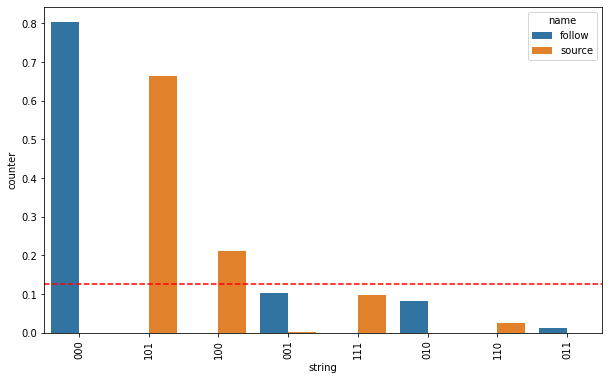

In [37]:
from inspector import OneNightStandInspector
from detectors import KS_Detector, Energy_Detector
detector = KS_Detector()
stat, pval = detector.check(counts_source, counts_follow)
print(f"stat: {stat}, pval: {pval}")
OneNightStandInspector(counts_source, counts_follow, name_a="source", name_b="follow", top_perc=1)